In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("df_nondemo_pred.csv")
df.head()

,MDM ID,Printer Total,HW Revenue,Registration_Dt,Product Price,lifetime_loyalty_class,ampv,hp_share,trade_cc,first_report,...,Series_Hp Deskjet,Series_Hp Envy,Series_Hp Ink,Series_Hp Officejet,Series_Hp Pagewide,Series_Hp Photosmart,Series_Hp Smart,Series_Hp Tango,credit_gold_1,Repurchase Prob
0,00008f57773a8813a9bfe807ec82b62f,1,99.99,2021-02-03,99.99,2,46.0,1.0,26.85,2018-05-31,...,0,1,0,0,0,0,0,0,0,0.548200
1,0003d72bdbbf747066d059911e8dd67f,1,226.00,2021-01-11,226.00,3,0.0,1.0,0.00,2021-01-31,...,0,1,0,0,0,0,0,0,0,0.367560
2,0004bc0c8070ec31e136e97d8b78b7d2,1,210.21,2020-08-05,210.21,2,10.0,1.0,1.28,2020-08-31,...,0,1,0,0,0,0,0,0,0,0.274853
3,00052bbcfd223424010f7a6ad38d1e18,1,192.00,2021-03-12,192.00,2,235.0,1.0,18.02,2021-03-31,...,0,0,0,1,0,0,0,0,0,0.744469
4,000590112f328b02e53d029f5f7c80e0,1,703.27,2020-11-14,703.27,2,288.0,1.0,17.73,2020-11-30,...,0,0,0,1,0,0,0,0,0,0.561028


In [6]:
df['last_report_y'].unique()

array([2020, 2021, 2019, 2018], dtype=int64)

In [7]:
df.columns

Index(['MDM ID', 'Printer Total', 'HW Revenue', 'Registration_Dt',
       'Product Price', 'lifetime_loyalty_class', 'ampv', 'hp_share',
       'trade_cc', 'first_report', 'last_report', 'current_plan',
       'first_report_y', 'last_report_y', 'available_ink_number', 'ampv_log',
       'blk_log', 'color_log', 'subscribed', 'subscription_paid', 'obsolete',
       'unsubscribed', 'Y', 'user_sub_environment_Office',
       'user_sub_environment_Unknown', 'Series_Hp Deskjet', 'Series_Hp Envy',
       'Series_Hp Ink', 'Series_Hp Officejet', 'Series_Hp Pagewide',
       'Series_Hp Photosmart', 'Series_Hp Smart', 'Series_Hp Tango',
       'credit_gold_1', 'Repurchase Prob'],
      dtype='object')

In [8]:
df['Repurchase Prob'].head()

0    0.548200
1    0.367560
2    0.274853
3    0.744469
4    0.561028
Name: Repurchase Prob, dtype: float64

In [9]:
df = df.drop(['MDM ID', 'Printer Total', 'Registration_Dt', 'ampv'],axis=1)

In [10]:
len(df)

1740186

# Label customer

In [19]:
from scipy.stats import zscore

<AxesSubplot:xlabel='ampv_log', ylabel='Count'>

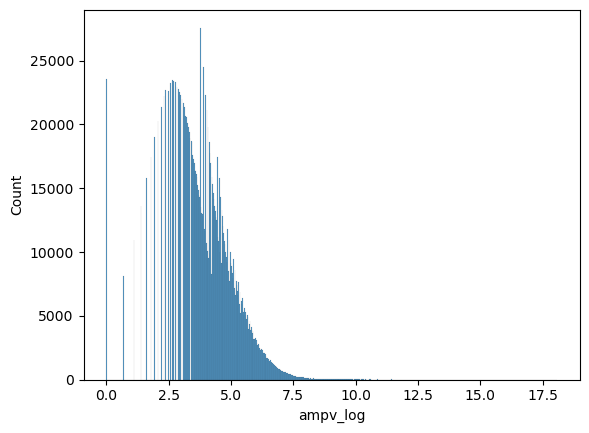

In [22]:
sns.histplot(data = df, x='ampv_log')

In [21]:
df['ampv_log']

0          3.850148
1          0.000000
2          2.397895
3          5.463832
4          5.666427
             ...   
1740181    2.197225
1740182    3.891820
1740183    3.850148
1740184    4.852030
1740185    3.178054
Name: ampv_log, Length: 1740186, dtype: float64

In [28]:
zs = df[['ampv_log','blk_log','color_log']].apply(zscore)

,ampv_log,blk_log,color_log
0,-0.021194,-0.537317,-0.640659
1,-3.022499,-1.378570,-1.190391
2,-1.153268,-1.076077,-0.918394
3,1.236721,1.356442,1.491422
4,1.394649,1.411203,0.676472
...,...,...,...
1740181,-1.309697,-1.200948,-1.054393
1740182,0.011291,-0.438940,0.082403
1740183,-0.021194,-0.991982,-0.328091
1740184,0.759803,0.586059,-0.078371


In [32]:
zscore = zs.sum(axis=1)

In [34]:
df['engagement score'] = zscore

<AxesSubplot:ylabel='Count'>

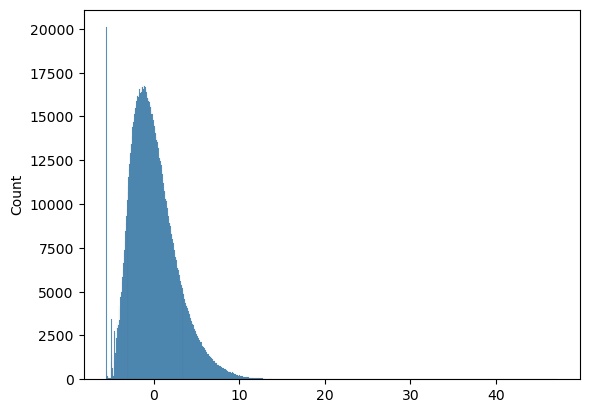

In [33]:
sns.histplot(data=zscore)

In [61]:
df.columns

Index(['HW Revenue', 'Product Price', 'lifetime_loyalty_class', 'hp_share',
       'trade_cc', 'first_report', 'last_report', 'current_plan',
       'first_report_y', 'last_report_y', 'available_ink_number', 'ampv_log',
       'blk_log', 'color_log', 'subscribed', 'subscription_paid', 'obsolete',
       'unsubscribed', 'Y', 'user_sub_environment_Office',
       'user_sub_environment_Unknown', 'Series_Hp Deskjet', 'Series_Hp Envy',
       'Series_Hp Ink', 'Series_Hp Officejet', 'Series_Hp Pagewide',
       'Series_Hp Photosmart', 'Series_Hp Smart', 'Series_Hp Tango',
       'credit_gold_1', 'Repurchase Prob', 'Repurchase Propensity',
       'engagement score', 'printer_environment', 'new/old customer'],
      dtype='object')

In [40]:
df['printer_environment'] = np.where(df['user_sub_environment_Office'] == 1, "Office",
                                     np.where(df['user_sub_environment_Unknown'] == 1, "Unknown", "Home"))

In [58]:
df['new/old customer'] = np.where(df['last_report_y'] < 2021, "Old", "New")

In [86]:
pop_n_o = n_o[0]/n_o[1]
pop_hm_of = hm_of[0]/hm_of[1]
pop_sc = df['engagement score'].mean()
print(pop_n_o,pop_hm_of, pop_sc)

high_n_o = cat_n_o[0]/cat_n_o[1]
low_n_o = cat_n_o[2]/cat_n_o[3]
medium_n_o = cat_n_o[4]/cat_n_o[5]

high_hm_of = cat_hm_of[0]/cat_hm_of[1]
low_hm_of = cat_hm_of[3]/cat_hm_of[4]
medium_hm_of = cat_hm_of[6]/cat_hm_of[7]

high_sc = cat_sc[0]
low_sc = cat_sc[1]
medium_sc = cat_sc[2]

print(high_n_o, high_hm_of, high_sc)
print(low_n_o, low_hm_of, low_sc)
print(medium_n_o, medium_hm_of, medium_sc)

3.4757985488645806 13.55723230776161 -2.417610663541862e-15
1.1261984800722031 2.9088887123679403 3.3348385539907976
3298.0495049504952 2284.7642857142855 -2.2873470569812255
3.588211844136457 27.326463010673535 -0.2976321124928967


In [104]:
vis_df = pd.DataFrame({"New / Old":[pop_n_o, high_n_o, medium_n_o , low_n_o], 
              "Home / Office":[pop_hm_of, high_hm_of, medium_hm_of, low_hm_of],
              "Avg Engagement Score":[pop_sc, high_sc, medium_sc,low_sc]})
vis_df['Category'] = ['Pop', "High", "Medium", "Low"]
vis_df = vis_df.set_index('Category')
vis_df

,New / Old,Home / Office,Avg Engagement Score
Category,,,
Pop,3.475799,13.557232,-2.417611e-15
High,1.126198,2.908889,3.334839e+00
Medium,3.588212,27.326463,-2.976321e-01
Low,3298.049505,2284.764286,-2.287347e+00


In [180]:
vis_log = vis_df[['New / Old','Home / Office']].apply(np.log10)
vis_log

,New / Old,Home / Office
Category,,
Pop,0.541055,1.132171
High,0.051615,0.463727
Medium,0.554878,1.436583
Low,3.518257,3.358841


In [181]:
vis_eng = vis_df[["Avg Engagement Score"]]
vis_eng = vis_eng.drop(['Pop'])
vis_eng

,Avg Engagement Score
Category,
High,3.334839
Medium,-0.297632
Low,-2.287347


In [182]:
rng_eng = vis_eng.max() - vis_eng.min()
min_eng = vis_eng.min()
rng_eng

Avg Engagement Score    5.622186
dtype: float64

In [183]:
vis_eng = vis_eng['Avg Engagement Score'].apply(lambda x: (x-min_eng)/rng_eng)
vis_eng

,Avg Engagement Score
Category,
High,1.000000
Medium,0.353904
Low,0.000000


In [193]:
rng = vis_log.max(axis=0) - vis_log.min(axis=0)
baseline = vis_log.loc["Pop",:]
high_vis = (vis_log.loc["High",:]-baseline)/rng
med_vis = (vis_log.loc["Medium",:]-baseline)/rng
low_vis = (vis_log.loc["Low",:]-baseline)/rng

In [194]:
vis.loc["High",:] = dict(high_vis)
vis.loc["Medium",:] = dict(med_vis)
vis.loc["Low",:] = dict(low_vis)

In [195]:
#vis = vis.drop(['Category'],axis=1)
vis

,index,New / Old,Home / Office,Avg Engagement Score
0,High,-0.141186,-0.230887,NaN
1,Medium,0.003988,0.105147,NaN
2,Low,0.858814,0.769113,NaN
High,NaN,-0.141186,-0.230887,NaN
Medium,NaN,0.003988,0.105147,NaN
Low,NaN,0.858814,0.769113,NaN


In [196]:
vis = vis.drop(['Avg Engagement Score'],axis=1)

In [197]:
vis

,index,New / Old,Home / Office
0,High,-0.141186,-0.230887
1,Medium,0.003988,0.105147
2,Low,0.858814,0.769113
High,NaN,-0.141186,-0.230887
Medium,NaN,0.003988,0.105147
Low,NaN,0.858814,0.769113


In [198]:
vis = vis.drop([0,1,2])
vis

,index,New / Old,Home / Office
High,NaN,-0.141186,-0.230887
Medium,NaN,0.003988,0.105147
Low,NaN,0.858814,0.769113


In [199]:
vis = pd.concat([vis, vis_eng], axis=1)
vis

,index,New / Old,Home / Office,Avg Engagement Score
High,NaN,-0.141186,-0.230887,1.000000
Medium,NaN,0.003988,0.105147,0.353904
Low,NaN,0.858814,0.769113,0.000000


In [200]:
vis = vis.drop(['index'],axis=1)
vis = vis.reset_index()
vis

,index,New / Old,Home / Office,Avg Engagement Score
0,High,-0.141186,-0.230887,1.000000
1,Medium,0.003988,0.105147,0.353904
2,Low,0.858814,0.769113,0.000000


In [207]:
svg_org = vis_df[["Avg Engagement Score"]]
cvg_org = svg_org.reset_index(drop=True)

In [214]:
avg_org = cvg_org.drop([0])
avg_org = avg_org.reset_index(drop=True)

In [216]:
vis = pd.concat([vis,avg_org],axis=1)

In [217]:
vis.to_csv("vis.csv")

In [95]:
vis = vis_df.copy(deep=True)

In [84]:
cat_sc = df.groupby("Repurchase Propensity")['engagement score'].mean()
cat_sc

Repurchase Propensity
High      3.334839
Low      -2.287347
Medium   -0.297632
Name: engagement score, dtype: float64

In [78]:
cat_hm_of = df.groupby(["Repurchase Propensity", 'printer_environment'])['new/old customer'].count()
cat_hm_of

Repurchase Propensity  printer_environment
High                   Home                   219720
                       Office                  75534
                       Unknown                 29846
Low                    Home                   319867
                       Office                    140
                       Unknown                 13197
Medium                 Home                   965198
                       Office                  35321
                       Unknown                 81363
Name: new/old customer, dtype: int64

In [77]:
cat_n_o = df.groupby(["Repurchase Propensity", 'new/old customer'])['new/old customer'].count()
cat_n_o

Repurchase Propensity  new/old customer
High                   New                 172198
                       Old                 152902
Low                    New                 333103
                       Old                    101
Medium                 New                 846086
                       Old                 235796
Name: new/old customer, dtype: int64

In [68]:
n_o = df.groupby('new/old customer')['new/old customer'].count()
hm_of = df.groupby("printer_environment")['printer_environment'].count()

print(n_o)
print(hm_of)

new/old customer
New    1351387
Old     388799
Name: new/old customer, dtype: int64
printer_environment
Home       1504785
Office      110995
Unknown     124406
Name: printer_environment, dtype: int64


In [62]:
df_tab = df.drop(['user_sub_environment_Office',
       'user_sub_environment_Unknown', 'Series_Hp Deskjet', 'Series_Hp Envy',
       'Series_Hp Ink', 'Series_Hp Officejet', 'Series_Hp Pagewide',
       'Series_Hp Photosmart', 'Series_Hp Smart', 'Series_Hp Tango',
       'credit_gold_1'], axis=1)

In [63]:
df_tab.to_csv("visualization.csv")

In [23]:
df[['ampv_log','blk_log','color_log']].describe()

,ampv_log,blk_log,color_log
count,1.740186e+06,1.740186e+06,1.740186e+06
mean,3.877336e+00,1.016945e+00,8.342485e-01
std,1.282825e+00,7.376813e-01,7.008191e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.091042e+00,4.824261e-01,2.700271e-01
50%,3.871201e+00,8.628900e-01,6.729445e-01
75%,4.663439e+00,1.376244e+00,1.217876e+00
max,1.807417e+01,1.381256e+01,1.398123e+01


<AxesSubplot:>

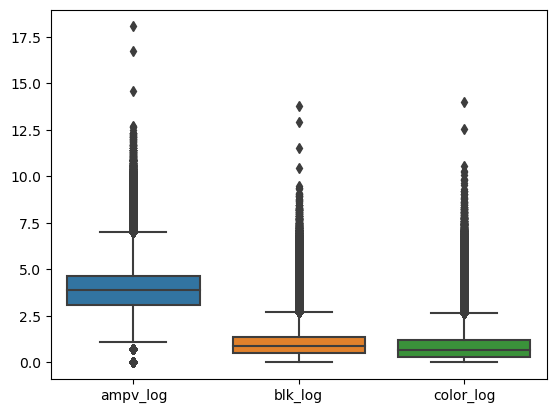

In [18]:
sns.boxplot(data=df[['ampv_log','blk_log','color_log']])

<AxesSubplot:xlabel='Repurchase Prob', ylabel='Count'>

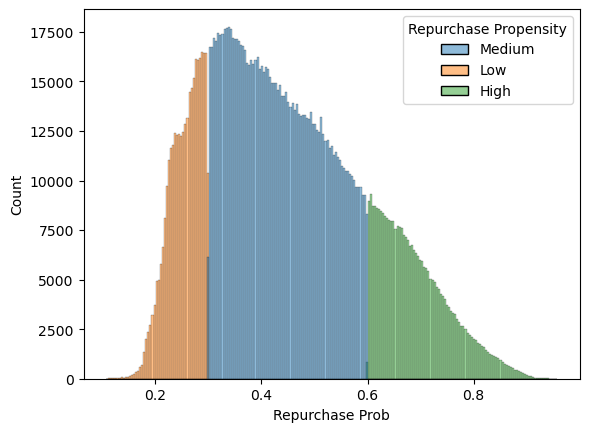

In [12]:
sns.histplot(data=df, x='Repurchase Prob', hue='Repurchase Propensity')

In [11]:
df['Repurchase Propensity'] = np.where(df['Repurchase Prob'] < 0.3, "Low", 
                                      (np.where(df['Repurchase Prob'] > 0.6, "High", "Medium")))

In [ ]:
df.groupby('Repurchase Propensity')['Repurchase Propensity'].count()

In [ ]:
sns.histplot(data=df, x='Repurchase Propensity')

In [ ]:
df_rm = df.drop(['Repurchase Prob','HW Revenue','Y','last_report','first_report'],axis=1)

In [ ]:
df_rm.to_csv("DT_nonsurvey.csv")

In [ ]:
sns.boxplot(data=df, x='blk_log')

# Segment customer

In [ ]:
df_rm = df.drop(['Repurchase Prob','HW Revenue'],axis=1)

In [ ]:
survey_low = df_rm[df_rm['Repurchase Propensity'] == "Low"]
survey_medium = df_rm[df_rm['Repurchase Propensity'] == "Medium"]
survey_high = df_rm[df_rm['Repurchase Propensity'] == "High"]

In [ ]:
survey_low.to_csv("survey_low.csv")
survey_medium.to_csv("survey_medium.csv")
survey_high.to_csv("survey_high.csv")

In [ ]:
survey_high.columns